This image is: <class 'numpy.ndarray'>  with dimensions: (560, 604, 3)


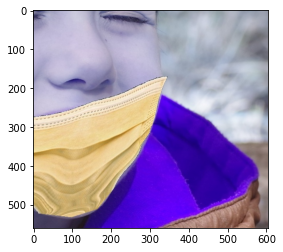

In [1114]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

image = cv2.imread(r'new_incorrect_mask\1474_00968_Mask_Mouth_Chin.jpg')
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

image_copy = np.copy(image)
plt.imshow(image_copy)

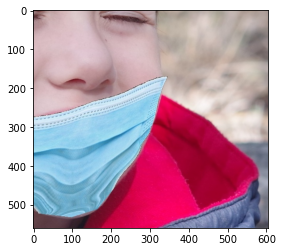

In [1115]:
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

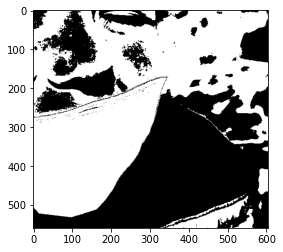

In [1116]:
lower_blue = np.array([20,100,150])  
upper_blue = np.array([218,240,255])
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

In [1117]:
mask.shape

(560, 604)

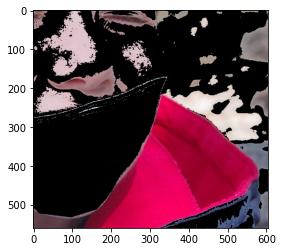

In [1118]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

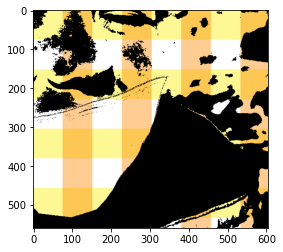

In [1119]:
background_image = cv2.imread(r'textures\check\check_3.png')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = background_image[0:mask.shape[0], 0:mask.shape[1]]

crop_background[mask == 0] = [0,0,0]
plt.imshow(crop_background)

In [1120]:
background_image.shape

(1280, 1280, 3)

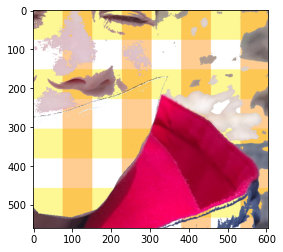

In [1121]:
complete_image = masked_image + crop_background
plt.imshow(complete_image)

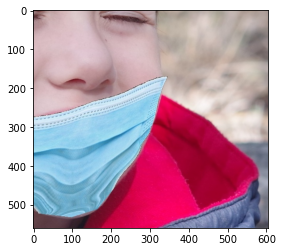

In [1122]:
plt.imshow(image_copy)

In [1141]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
%matplotlib inline

base_dir = r'new_incorrect_mask'
texture_dir = r'textures'
new_dir = r'coloured_incorrect_mask'
count = 0

for file in os.listdir(base_dir):
    image_path = os.path.join(base_dir, file)
    image = cv2.imread(image_path)
    
    image_copy = np.copy(image)
    
    image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
    
    lower_blue = np.array([20,100,150])  
    upper_blue = np.array([170,240,255])
    mask = cv2.inRange(image_copy, lower_blue, upper_blue)
    
    masked_image = np.copy(image_copy)
    masked_image[mask != 0] = [0, 0, 0]
    
    mod = count % 32
    save = os.path.join(new_dir, file)
    
    if mod != 0:
        bg_image_path = os.path.join(texture_dir, str(mod) + '.jpg')
    
        background_image = cv2.imread(bg_image_path)
        background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
        crop_background = background_image[0:mask.shape[0], 0:mask.shape[1]]

        crop_background[mask == 0] = [0,0,0]
    
        complete_image = masked_image + crop_background
        complete_image = cv2.cvtColor(complete_image, cv2.COLOR_RGB2BGR)

        cv2.imwrite(save, complete_image)
    else:
        cv2.imwrite(save, image)
    count += 1